In [1]:
import pandas as pd
from sklearn.datasets import load_boston

# load data
boston = load_boston()
X = pd.DataFrame(boston.data, columns=boston.feature_names)
X.drop('CHAS', axis=1, inplace=True)
y = pd.Series(boston.target, name='MEDV')

# inspect data
X.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [2]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

print(f'Coefficients: {lin_reg.coef_}')
print(f'Intercept: {lin_reg.intercept_}')
print(f'R^2 score: {lin_reg.score(X, y)}')

Coefficients: [-1.12227407e-01  4.70252171e-02  4.06441315e-02 -1.73969886e+01
  3.84517903e+00  2.84684840e-03 -1.48555729e+00  3.27895368e-01
 -1.37513229e-02 -9.91733111e-01  9.82674304e-03 -5.34914383e-01]
Intercept: 36.92503262346165
R^2 score: 0.7354743593558175


In [4]:
import statsmodels.api as sm

X_constant = sm.add_constant(X)
lin_reg = sm.OLS(y,X_constant).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     114.2
Date:                Sun, 28 Jul 2019   Prob (F-statistic):          7.59e-134
Time:                        15:52:32   Log-Likelihood:                -1503.8
No. Observations:                 506   AIC:                             3034.
Df Residuals:                     493   BIC:                             3089.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.9250      5.148      7.173      0.000      26.811      47.039
CRIM          -0.1122      0.033     -3.405      0.001      -0.177      -0.047
ZN             0.0470      0.014      3.396      0.001       0.020       0.074
INDUS          0.0406      0.062      0.659      0.510      -0.081       0.162
NOX          -17.3970      3.852     -4.516      0.000     -24.966      -9.828
RM             3.8452      0.421      9.123      0.000       3.017       4.673
AGE            0.0028      0.013      0.214      0.831      -0.023       0.029
DIS           -1.4856      0.201     -7.383      0.000      -1.881      -1.090
RAD            0.3279      0.067      4.928      0.000       0.197       0.459
TAX           -0.0138      0.004     -3.651      0.000      -0.021      -0.006
PTRATIO       -0.9917      0.131     -7.547      0.000      -1.250      -0.734
B              0.0098      0.003      3.635      0.000       0.005       0.015
LSTAT         -0.5349      0.051    -10.479      0.000      -0.635      -0.435
==============================================================================
Omnibus:                      190.837   Durbin-Watson:                   1.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              897.143
Skew:                           1.619   Prob(JB):                    1.54e-195
Kurtosis:                       8.663   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

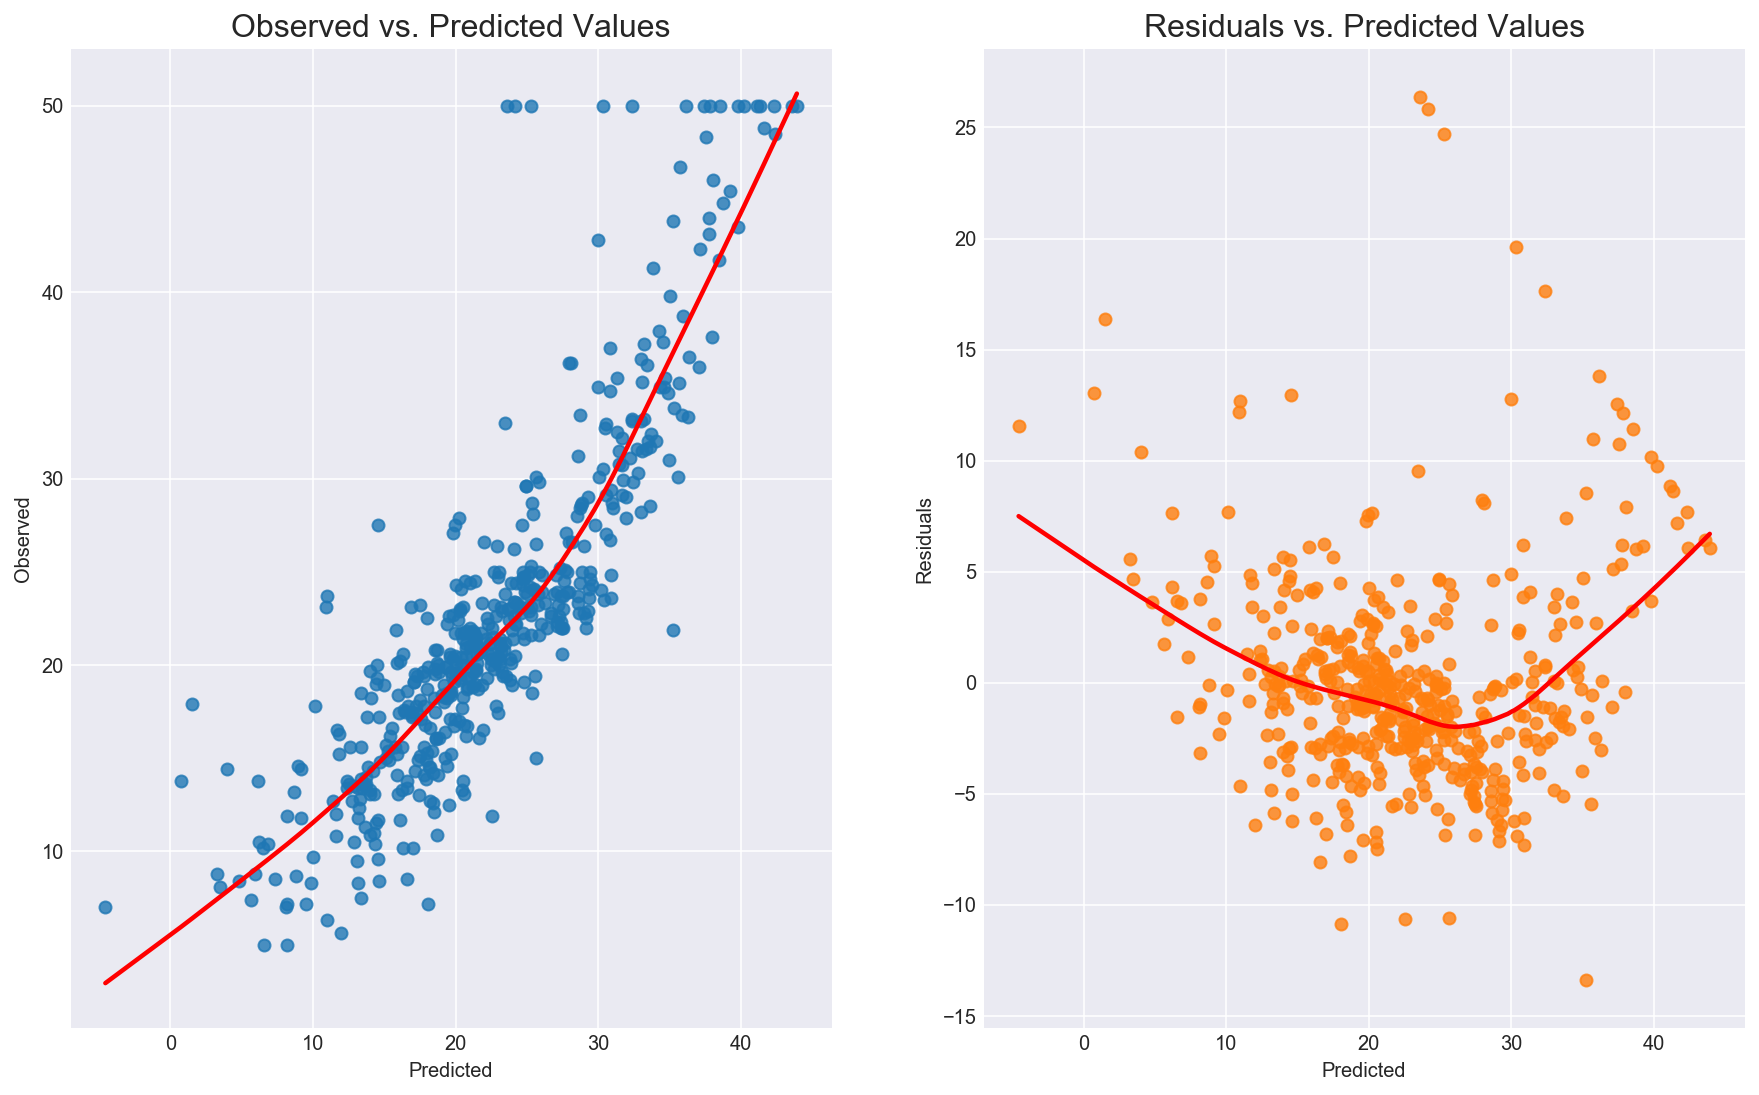

In [5]:
%matplotlib inline
%config InlineBackend.figure_format ='retina'
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)

def linearity_test(model, y):
    '''
    Function for visually inspecting the assumption of linearity in a linear regression model.
    It plots observed vs. predicted values and residuals vs. predicted values.
    
    Args:
    * model - fitted OLS model from statsmodels
    * y - observed values
    '''
    fitted_vals = model.predict()
    resids = model.resid

    fig, ax = plt.subplots(1,2)
    
    sns.regplot(x=fitted_vals, y=y, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Observed vs. Predicted Values', fontsize=16)
    ax[0].set(xlabel='Predicted', ylabel='Observed')

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Residuals vs. Predicted Values', fontsize=16)
    ax[1].set(xlabel='Predicted', ylabel='Residuals')
    
linearity_test(lin_reg, y)    

In [6]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(X_constant.values, i) for i in range(X_constant.shape[1])]
pd.DataFrame({'vif': vif[1:]}, index=X.columns).T

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
vif,1.768968,2.298144,3.948771,4.390146,1.932303,3.092845,3.95557,7.394174,8.8762,1.783412,1.342213,2.927644


ValueError: DataFrame constructor not properly called!

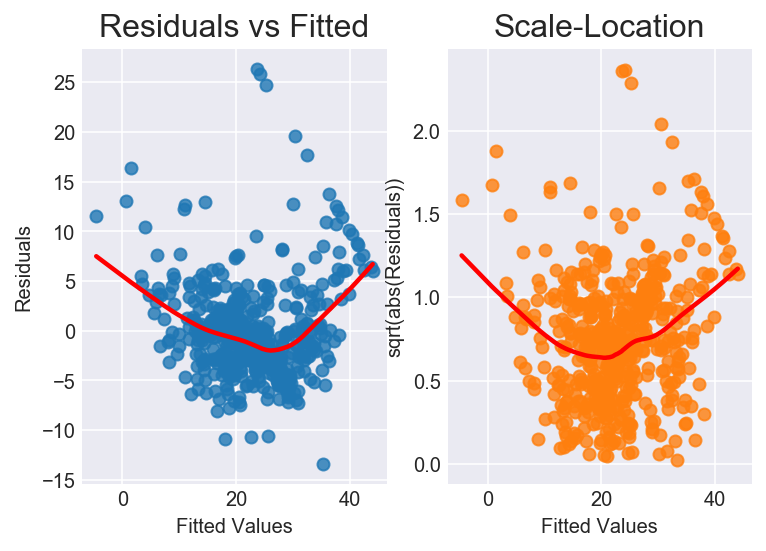

In [12]:
%matplotlib inline
%config InlineBackend.figure_format ='retina'
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
#sms.set_style('darkgrid')
#sms.mpl.rcParams['figure.figsize'] = (15.0, 9.0)

def homoscedasticity_test(model):
    '''
    Function for testing the homoscedasticity of residuals in a linear regression model.
    It plots residuals and standardized residuals vs. fitted values and runs Breusch-Pagan and Goldfeld-Quandt tests.
    
    Args:
    * model - fitted OLS model from statsmodels
    '''
    fitted_vals = model.predict()
    resids = model.resid
    resids_standardized = model.get_influence().resid_studentized_internal

    fig, ax = plt.subplots(1,2)

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Residuals vs Fitted', fontsize=16)
    ax[0].set(xlabel='Fitted Values', ylabel='Residuals')

    sns.regplot(x=fitted_vals, y=np.sqrt(np.abs(resids_standardized)), lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Scale-Location', fontsize=16)
    ax[1].set(xlabel='Fitted Values', ylabel='sqrt(abs(Residuals))')

    bp_test = pd.DataFrame(sms.het_breuschpagan(resids, model.model.exog), 
                           columns=['value'],
                           index=['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value'])

    gq_test = pd.DataFrame(sms.het_goldfeldquandt(resids, model.model.exog)[:-1],
                           columns=['value'],
                           index=['F statistic', 'p-value'])

    print('\n Breusch-Pagan test ----')
    print(bp_test)
    print('\n Goldfeld-Quandt test ----')
    print(gq_test)
    print('\n Residuals plots ----')

homoscedasticity_test(lin_reg)
